I've seen this [dataset](https://www.kaggle.com/c/titanic/data) and worked with it before in terms of predicting survival in Udacity's [Intro to Data Science](https://www.udacity.com/course/intro-to-data-science--ud359) course, so I'll investigate some alternative strictly descriptive avenues. Let's look at the people of the [Titanic](https://en.wikipedia.org/wiki/RMS_Titanic).

## Questions
* What is the distribution of the passenger classes by sex, age, and port of departure?
* What is the distribution of family size by passenger class and port of embarkation?

This is the first occasion I've considered [Cherbourg](https://en.wikipedia.org/wiki/Cherbourg-Octeville), [Queenstown](https://en.wikipedia.org/wiki/Cobh), and [Southamption](https://en.wikipedia.org/wiki/Southampton) offering three different populations to the Titanic.

Let's get a first look at the data by importing it into a DataFrame.

In [88]:
import numpy as np
import pandas as pd

titanic_df = pd.read_csv('C:\\Users\\Nathan\\Dropbox\\study\\udacity\\DAND\\project2\\titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


I'm going to use the *Pclass* (passenger class), *Sex*, *Age*, *SibSp* (number of siblings or spouse aboard), *Parch* (number of parents or children aboard), and *Embarked* (port of departure) columns so let's get those into a new dataframe and cleaned. I will [round](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.round.html) off the ages for ease of computation and [drop NaN values](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.Series.dropna.html) in the age and embarked columns. 

The observant reader may notice that a checkbox for "part of a family that is on board" is not one of the columns. I am going to make an assumption that may be false in some cases and presume that anyone who has a family member on board is part of a family group that stuck together. That requires creating a new column.

In [163]:
titanic_df['family_size'] = titanic_df['SibSp'] + titanic_df['Parch']
people_df = titanic_df[['Embarked', 'Pclass','Sex', 'family_size']]
people_df['Age'] = titanic_df['Age'].round()
people_df = people_df.dropna()
people_df.head()

C:\Users\Nathan\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Embarked,Pclass,Sex,family_size,Age
0,S,3,male,1,22
1,C,1,female,1,38
2,S,3,female,0,26
3,S,1,female,1,35
4,S,3,male,0,35


The data seems reasonably clean for answering my questions so let's get to it.

## Question 1: What is the distribution of the passenger classes by sex, age, and port of departure?

For this I'll need seaborn documentation on [facetting histograms](http://stanford.edu/~mwaskom/software/seaborn/examples/faceted_histogram.html?highlight=linspace), the [FacetGrid](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html?highlight=facetgrid) function, and numpy's [linspace](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linspace.html) function. I got the idea to use seaborn from another [student's project](https://github.com/profversaggi/Udacity_Nano_DataScience/blob/master/Project_2/Project%20%23%202%20Submission%20-%20Investigate%20a%20Dataset%20-%20Titanic.ipynb) and its pretty plots.

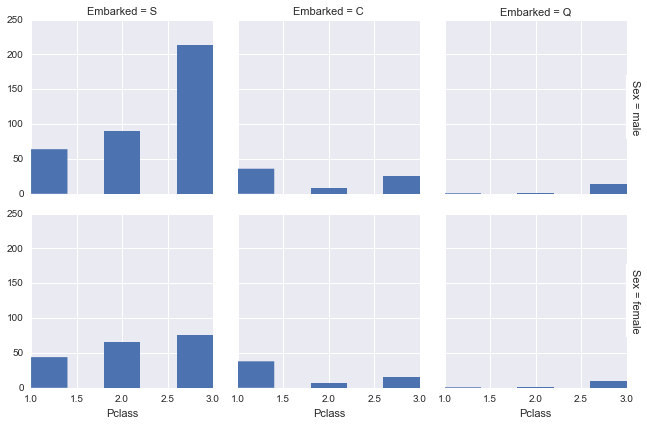

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

sns.set(style="darkgrid")

grid = sns.FacetGrid(people_df, row='Sex', col='Embarked', margin_titles=True)
bins = np.linspace(1, 3, 6)
grid.map(plt.hist, "Pclass", bins=bins, lw=0)

Southampton was by far the most popular port of departure. Almost all of the first class passengers boarded from either Southampton or Cherbourg. I suppose the wealthy of Queenstown, Ireland counted themselves lucky unless there just weren't many wealthy Irish patrons to be had.

How does the passenger class distribution look by age? Let's see the aggregate and then break it down. We can use pandas built-in [histogram function](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.hist.html).

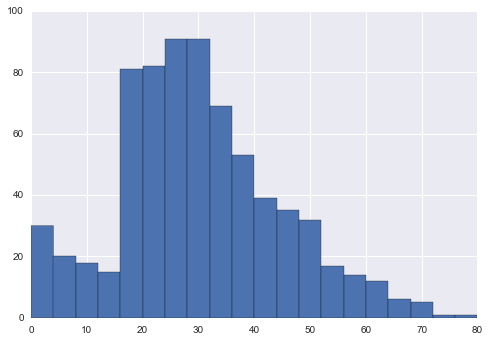

In [134]:
people_df['Age'].hist(bins=20)

In [135]:
people_df['Age'].describe()

count    712.000000
mean      29.636236
std       14.490930
min        0.000000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The mean is greater than the median, so by definition we have [positive skew](https://en.wikipedia.org/wiki/Skewness), which is easy to see in the above histogram. The passengers overall tend to be young adults. The range of values in the first two quartiles is smaller than the range in the latter two quartiles, which again suggests density around youth.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000003DC3F550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000003DF90E80>], dtype=object)

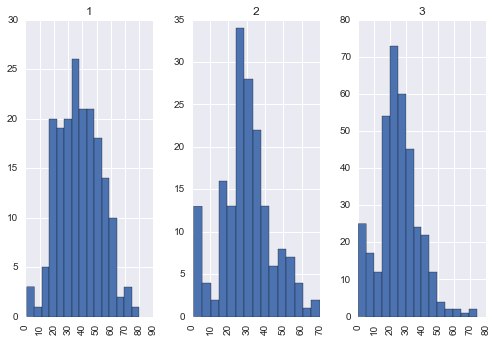

In [136]:
people_df['Age'].hist(bins=15, by=Pclass, layout=(1, 3))

Those histograms look fairly similar with first class looking more like a normal distribution. Let's take a [boxplot view](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html) of the situation. I had [some trouble](https://discussions.udacity.com/t/how-to-make-a-boxplot/44109/6?u=nathaniel) creating this boxplot but figured it out eventually.

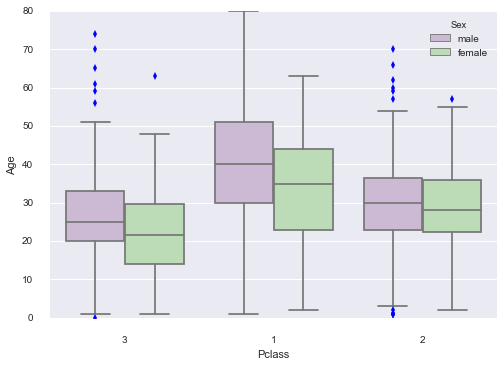

In [146]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=people_df, palette="PRGn")
sns.despine(offset=10, trim=True)

Third class passengers are the youngest. Second class passengers have the greatest age parity between males and females, which perhaps implies something about social organization, since females in first and third class tend to be younger than their male counterparts. 

If we think of age as a factor in wealth accumulation, then it would be reasonable to think that the youngest class cohort is in third class and the oldest cohort is in first class.

The older outliers in second and third class are interesting. Why are the elderly going on this trip? The best reasonable explanation I have conjured is that they are immigrating with their families. I would think that trans-Atlantic travel is still onerous enough in 1912 that few elderly people would undertake the journey for leisure. Elderly merchants could be in second class, but I doubt that would be the case for the third class outliers.

Across all classes, the biggest age cohort is mid- to late twenties. I'm willing to speculate that this is due to most of the passengers being immigrants to the United States.


### Question 1 Summary
Most passengers departed from Southampton, England, most passengers were male, and many passengers were young adults.

## Question 2: What is the distribution of family size by passenger class and port of embarkation?

First an aggregate view of family size on the ship.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000041801438>]], dtype=object)

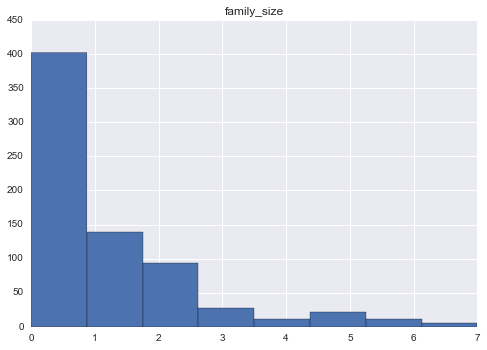

In [161]:
people_df.hist('family_size', bins=8)

Most people on this ship are single. The most promising explanation for this finding is that most passengers are emigres. Let's break it down by class and port. I'll use a [violinplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html#seaborn.violinplot), which shares some features with boxplots, especially the quartile and whisker values inside the violin, but applies what's called a [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) function to give a sense of where values congregate. Basically, values such as zero in the case of this plot are shown to be denser at the wider section of the violin shape.

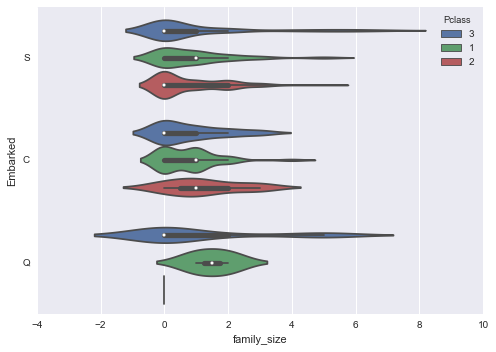

In [162]:
sns.violinplot(x="family_size", y="Embarked", hue="Pclass", data=people_df)

The Southampton and Cherbourg families make up most of the passengers. The Queenstown families are so few in number that it is difficult to say much about the group. We see a lot of outliers across categories because so many passengers boarded alone that the median is pulled down to either zero or one.

### Question 2 Summary
A large plurality of passengers are single. Southampton boarders had many outliers of large families (that is, four or more) across passenger classes.

## Conclusions
This was strictly a desriptive view of this dataset, which explored a couple questions about the [passengers](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic) themselves I had upon seeing it for a second time. Therefore, any inferences made are sufficiently weak on their own that they would not qualify as direct evidence for a particular claim. My comments throughout the analysis amount to a single claim, which would require additional primary evidence, such as diaries, to strengthen: *most passengers are emigres*. The descriptive findings support this claim indirectly but weakly.
1. Passenger ages skew toward young adults.
2. Most passengers are single.
3. Most passengers are male.
4. Most passengers bought third class tickets.

A new question for possible future investigation is the affect that being a part of a family predicts survival of the disaster. Presumably, families were able to stick together and claim lifeboats at higher rates than single persons.